In [1]:
from supervised.automl import AutoML
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from contextlib import redirect_stdout
import matplotlib.pyplot as plt


## 1. Loading dataset

In [139]:
dataset = pd.read_csv('ml_dataset.csv')
dataset_cleaned  = dataset[dataset.algo != 'Ensemble']
dataset_cleaned = dataset_cleaned.drop(columns=['did'])
dataset_cleaned['consumption']=dataset_cleaned['time']*dataset_cleaned['TDP']

-------------Decision Tree--------------


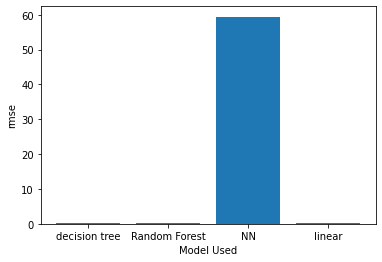

Min rmse:0.16307002653421024, Algorithm:Random Forest
-------------Linear--------------


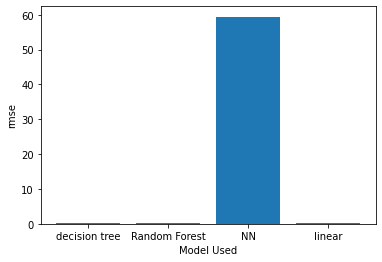

Min rmse:0.16319962737999183, Algorithm:Random Forest
-------------Neural Network--------------


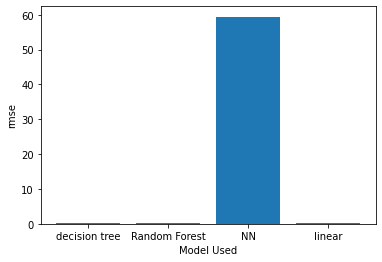

Min rmse:0.16268567133651596, Algorithm:Random Forest
-------------Random Forest--------------


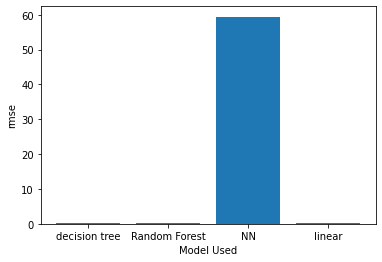

Min rmse:0.16328444013729979, Algorithm:Random Forest
-------------Ensemble--------------


KeyboardInterrupt: 

In [157]:
algos=dataset['algo'].unique()
models=[decision_tree, NN, linear_regression]
list_models=[{"name":"decision tree", "clf":decision_tree}, {"name":"Random Forest", "clf":random_forest}, {"name":"NN", "clf":NN},{"name":"linear",  "clf":linear_regression}]
#list_models=[{"name":"NN", "clf":neural_network}]
names=[x['name'] for x in list_models]
for algo in algos:
    print(f'-------------DATASET {algo}--------------')
    df=dataset_cleaned[dataset_cleaned['algo']==algo]
    df=dataset_cleaned.drop(columns=['algo','country'])
    df['consumption'].describe()
    df=df.dropna()
    X=df[df.columns[1:]]
    y=df[df.columns[0]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    rmse=[]
    for model in list_models:
        rmse.append(model['clf'](X_train,X_test, y_train,y_test))
    plt.ylabel("rmse")
    plt.xlabel("Model Used")
    plt.bar(names, rmse)
    plt.show()
    print(f'Min rmse:{np.min(rmse)}, Algorithm:{names[np.argmin(np.array(rmse))]}')
    

## 1. Models tuned

In [96]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import f1_score

### 2.0 Define X,y

In [118]:
df=dataset_LR.copy()
df=df.dropna()

In [122]:
X=df[df.columns[1:]]
y=df[df.columns[0]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### 2.1 Decision Tree

In [125]:
from sklearn.metrics import mean_squared_error
def decision_tree(X_train,X_test,y_train,y_test):
    clf = DecisionTreeRegressor()
    clf = clf.fit(X_train, y_train)
    return np.sqrt(mean_squared_error(y_test, clf.predict(X_test)))


In [126]:
decision_tree(X_train,X_test,y_train,y_test)

0.31041219334803555

### 2.2 Random Forest

In [154]:
from sklearn.ensemble import RandomForestRegressor
def random_forest(X_train,X_test,y_train,y_test):
    #hyperparameter-tuning
    # Number of trees in random forest
    n_estimators = [100, 200, 300, 1000]

    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(50, 100,10)]

    # Minimum number of samples required to split a node
    min_samples_split = [2, 5, 10]

    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2, 4]

    # Method of selecting samples for training each tree
    bootstrap = [True, False]

    # Create the random grid
    grid = {'n_estimators': n_estimators,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap': bootstrap
            }

    clf = RandomForestRegressor()
    clf_cv = RandomizedSearchCV(estimator = clf, param_distributions = grid, cv = 5, random_state=42)
    # Fit the random search model
    clf_cv.fit(X_train, y_train)

    return np.sqrt(mean_squared_error(y_test, clf_cv.predict(X_test)))

In [155]:
random_forest(X_train, X_test, y_train, y_test)

0.16324890212382764

### 2.3 NN

In [131]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
def NN(X_train, X_test, y_train, y_test):
    clf = MLPRegressor(random_state=1, max_iter=10000).fit(X_train, y_train)
    return np.sqrt(mean_squared_error(y_test, clf.predict(X_test)))

In [132]:
NN(X_train, X_test, y_train, y_test)

11.777484299903143

### 2.4 Linear Regression

In [133]:
from sklearn.linear_model import LinearRegression

def linear_regression(X_train, X_test, y_train, y_test):
    clf = LinearRegression()
    clf.fit(X_train, y_train)
    return np.sqrt(mean_squared_error(y_test, clf.predict(X_test)))

In [134]:
linear_regression(X_train, X_test, y_train, y_test)

0.2125330272203213

In [166]:

def standard_neural_network(x_training_set, y_training_set, x_test_set, y_test_set, classification=True,
                            hidden_layer_size=(8, 8, 8), activation='relu', solver='adam', print_report=True):
    if classification:
        clf = MLPClassifier(hidden_layer_size, activation=activation, solver=solver)
    else:
        clf = MLPRegressor(hidden_layer_size, activation=activation, solver=solver,max_iter=1000)

    grid = [
    {'solver': ['adam', 'sgd'],
     'learning_rate_init': [0.0001],
     'max_iter': [10000],
     'hidden_layer_sizes': [(50, 40), (40, 40), (30, 30), (20, 20)],
     'activation': ['logistic', 'tanh', 'relu'],
     'alpha': [0.0001, 0.001, 0.005],
     'early_stopping': [True, False]
     }
     
    clf.fit(X=x_training_set, y=y_training_set)

    accuracy = clf.score(x_test_set, y_test_set)
    y_pred = clf.predict(x_test_set)

    return np.sqrt(mean_squared_error(y_test, y_pred))

In [183]:
standard_neural_network(X_train,y_train,X_test,y_test,classification=False, hidden_layer_size=(3,3,3,3,3,3,3,3))

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.


0.7336587301713219

### 2.5 Neural Networks

In [202]:
from sklearn.neural_network import MLPClassifier
import numpy as np

def neural_network(X_train,X_test,y_train,y_test):
    # Create the random grid
    grid = [
    {'solver': ['adam', 'sgd'],
     'learning_rate_init': [0.0001],
     'max_iter': [10000],
     'hidden_layer_sizes': [(50, 40), (40, 40), (30, 30), (20, 20)],
     'activation': ['logistic', 'tanh', 'relu'],
     'alpha': [0.0001, 0.001, 0.005],
     'early_stopping': [True, False]
     }
]
    clf = MLPClassifier()
    clf_cv = RandomizedSearchCV(estimator = clf, param_distributions = grid, cv = 5, random_state=42)

    # Fit the random search model
    clf_cv.fit(X_train, y_train)
    return np.sqrt(mean_squared_error(y_test, clf_cv.best_estimator_.predict(X_test)))

In [203]:
neural_network(X_train,X_test,y_train,y_test)


50 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\stefa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\stefa\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 752, in fit
    return self._fit(X, y, incremental=False)
  File "C:\Users\stefa\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 393, in _fit
    X, y = self._validate_input(X, y, incremental, reset=first_pass)
  File "C:\Users\stefa\anaconda3\lib\site-packages\sklearn\ne

ValueError: Unknown label type: (array([0.77922078, 0.81203008, 0.96428571, ..., 0.44444444, 0.75      ,
       0.90909091]),)